# Plot Feature Importance Scores Across Models for Each Algorithm

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
os.chdir("/home/siti/Downloads/New Modelling")
results_folder = Path("Feature Importance Scores")
results_folder.mkdir(parents=True, exist_ok=True)

In [4]:

def extract_feature_importances(algorithm_folder, model_names, nested_folder):
#     nested_folder = "Version 2"
    dfs = []

    for model_name in model_names:
        # Construct the path for the feature importance CSV file
        csv_path = os.path.join(
            "/home/siti/Downloads/New Modelling", 
            algorithm_folder, 
            nested_folder,
            model_name, 
            "Feature_Importance.csv"
        )
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(csv_path)
        
        # Add a 'Model' column to keep track of the model
        df['Model'] = model_name
        df['Algorithm'] = algorithm_folder.split('_')[0]

        # Add the DataFrame to the list
        dfs.append(df)
        
    # Concatenate all DataFrames
    all_df = pd.concat(dfs, ignore_index=True)
    
    return all_df


# Feature importance for SMOTE (Model 1) and Under-sampling (Model 2)

In [20]:
# Set model names
model_names = ["Model 1", "Model 2"]

# Call the function and pass the algorithm folder name
all_DT_df = extract_feature_importances("DT_folder", model_names, nested_folder = "Version 2")

all_RF_df = extract_feature_importances("RandomForest_folder", model_names, nested_folder = "Version 2")

all_XGBoost_df = extract_feature_importances("XGBoost_folder", model_names, nested_folder = "Version 2")

# Convert to percentages
all_DT_df['Importance'] *= 100
all_RF_df['Importance'] *= 100
all_XGBoost_df['Importance'] *= 100

combined_importance = pd.concat([all_DT_df, all_RF_df, all_XGBoost_df], ignore_index=True)
combined_importance['Model'] = combined_importance['Model'].replace({'Model 1': 'SMOTE',
                                                                    'Model 2': 'Undersampling'})


In [21]:
combined_importance['Algorithm'] = combined_importance['Algorithm'].replace({'RandomForest': 'RF',
                                                                             'XGBoost':'XGB'})

# Feature importance for SMOTETomek


In [22]:
# Set model names
model_names = ["Model 1"]

# Call the function and pass the algorithm folder name
all_DT_df_smotetomek = extract_feature_importances("DT_folder", model_names, nested_folder = "SMOTETOMEK")

all_RF_df_smotetomek = extract_feature_importances("RandomForest_folder", model_names, nested_folder = "SMOTETOMEK")

all_XGBoost_df_smotetomek = extract_feature_importances("XGBoost_folder", model_names, nested_folder = "SMOTETOMEK")

# Convert to percentages
all_DT_df_smotetomek['Importance'] *= 100
all_RF_df_smotetomek['Importance'] *= 100
all_XGBoost_df_smotetomek['Importance'] *= 100

smotetomek_importance = pd.concat([all_DT_df_smotetomek, all_RF_df_smotetomek, all_XGBoost_df_smotetomek], ignore_index=True)
smotetomek_importance['Model'] = smotetomek_importance['Model'].replace({'Model 1': 'SMOTETomek'})



# Combined feature importance 

In [23]:
combined_importance = pd.concat([combined_importance, smotetomek_importance], ignore_index=True)
combined_importance.to_csv(results_folder / "combined_feature_importance_resampling.csv")

In [48]:
combined_importance['Algorithm'] = combined_importance['Algorithm'].replace({
                                                                                'RandomForest': 'RF',
                                                                                'XGBoost':'XGB'})
combined_importance

,Feature,Importance,Model,Algorithm,Normalized_Importance,Normalized_Importance_Percentage
0,Age_Band,53.220419,SMOTE,DT,0.532204,53.220419
1,AE_HRG,6.557033,SMOTE,DT,0.065570,6.557033
2,AE_Arrive_HourOfDay,5.090639,SMOTE,DT,0.050906,5.090639
3,TFC_180,4.406772,SMOTE,DT,0.044068,4.406772
4,TFC_420,4.230531,SMOTE,DT,0.042305,4.230531
...,...,...,...,...,...,...
142,Sex_Male,0.901172,SMOTETomek,XGB,0.009012,0.901172
143,AE_Num_Diagnoses,0.631068,SMOTETomek,XGB,0.006311,0.631068
144,AE_Time_Mins,0.243535,SMOTETomek,XGB,0.002435,0.243535
145,AE_Num_Treatments,0.242497,SMOTETomek,XGB,0.002425,0.242497


# Top 15 most important features (standardised)

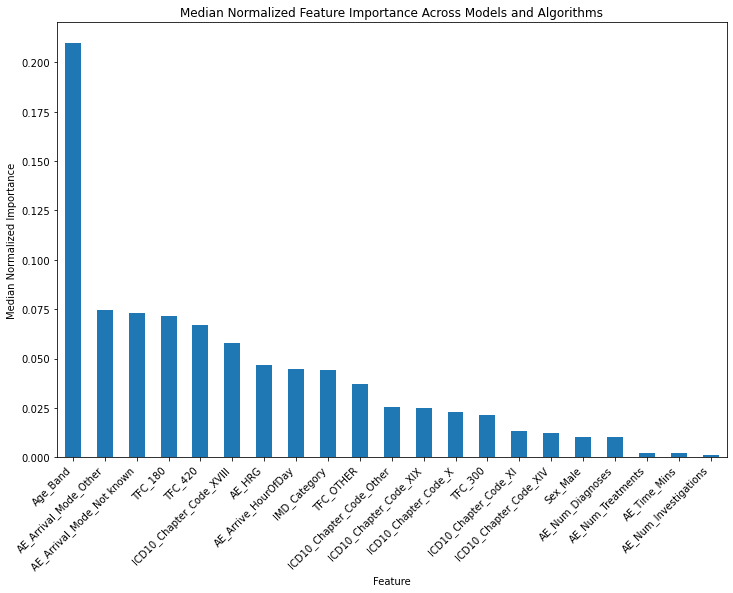

In [43]:
# Normalize the importance score for each (Model, Algorithm) pair
grouped = combined_importance.groupby(['Model', 'Algorithm'])
combined_importance['Normalized_Importance'] = grouped['Importance'].transform(lambda x: x / x.sum())

# Compute median importance for each feature
median_importance = combined_importance.groupby('Feature')['Normalized_Importance'].median().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
median_importance.plot(kind='bar')
plt.title('Median Normalized Feature Importance Across Models and Algorithms')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Feature')
plt.ylabel('Median Normalized Importance')
plt.savefig(results_folder / "combined_feature_importance.png", bbox_inches='tight')
plt.show()

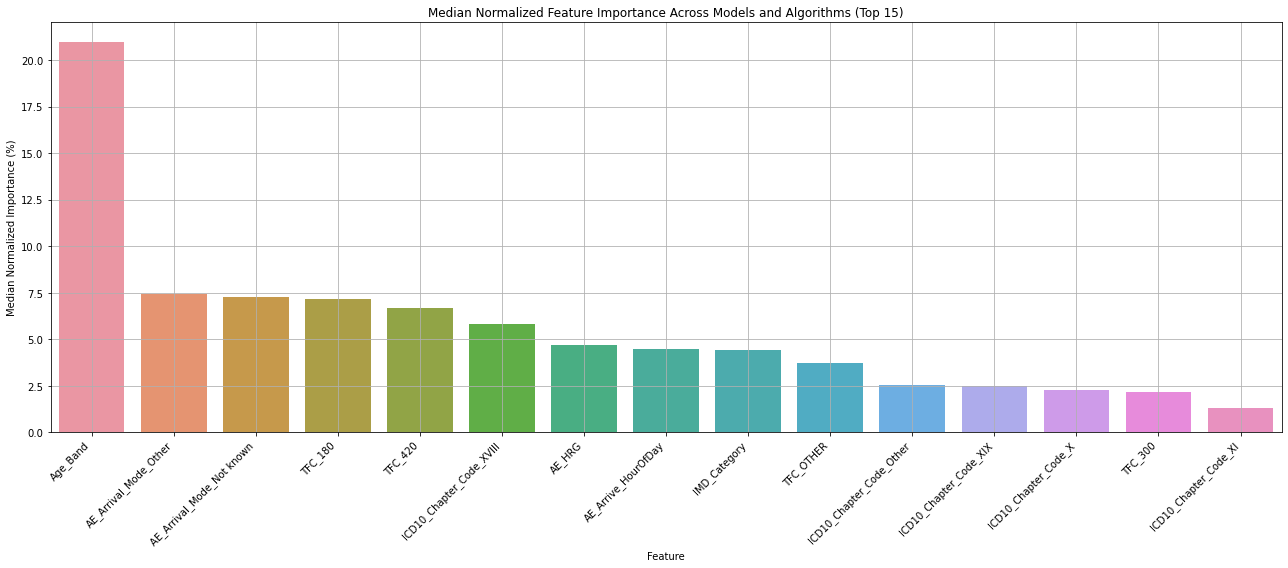

In [44]:
# Normalize the importance score for each (Model, Algorithm) pair
grouped = combined_importance.groupby(['Model', 'Algorithm'])
combined_importance['Normalized_Importance'] = grouped['Importance'].transform(lambda x: x / x.sum())

# Convert to percentage
combined_importance['Normalized_Importance_Percentage'] = combined_importance['Normalized_Importance'] * 100

# Compute median importance for each feature and sort
median_importance = combined_importance.groupby('Feature')['Normalized_Importance_Percentage'].median().sort_values(ascending=False)

# Take only top 15 features
median_importance_top15 = median_importance.head(15).reset_index()
median_importance_top15.columns = ['Feature', 'Median Normalized Importance (%)']

# Plotting using Seaborn
plt.figure(figsize=(18, 8))
sns.barplot(x='Feature', y='Median Normalized Importance (%)', data=median_importance_top15)

plt.title('Median Normalized Feature Importance Across Models and Algorithms (Top 15)')
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate x-axis labels 45 degrees
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(results_folder / "combined_feature_importance2.png", bbox_inches='tight')
plt.show()

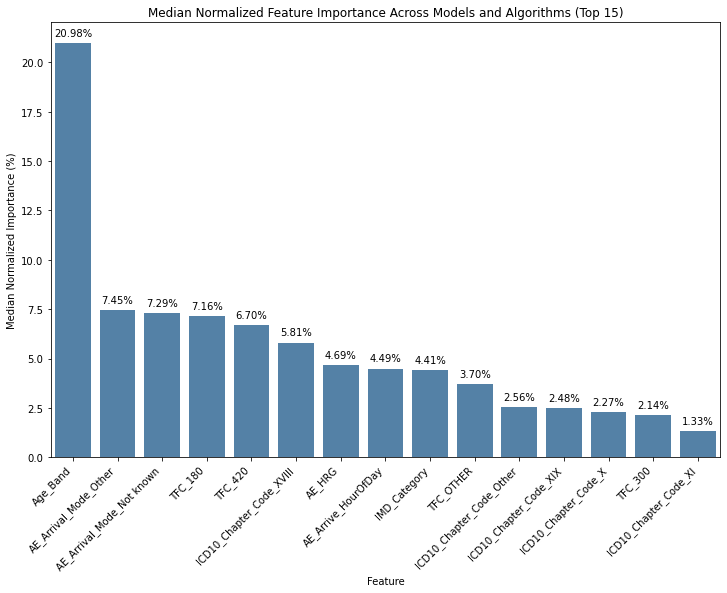

In [60]:

# Normalize the importance score for each (Model, Algorithm) pair
grouped = combined_importance.groupby(['Model', 'Algorithm'])
combined_importance['Normalized_Importance'] = grouped['Importance'].transform(lambda x: x / x.sum())

# Convert to percentage
combined_importance['Normalized_Importance_Percentage'] = combined_importance['Normalized_Importance'] * 100

# Compute median importance for each feature and sort
median_importance = combined_importance.groupby('Feature')['Normalized_Importance_Percentage'].median().sort_values(ascending=False)

# Take only top 15 features
median_importance_top15 = median_importance.head(15).reset_index()
median_importance_top15.columns = ['Feature', 'Median Normalized Importance (%)']

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=median_importance_top15, x='Feature', y='Median Normalized Importance (%)', color='steelblue')

plt.title('Median Normalized Feature Importance Across Models and Algorithms (Top 15)')
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.xlabel('Feature')
plt.ylabel('Median Normalized Importance (%)')

# Annotate points
for i, txt in enumerate(median_importance_top15['Median Normalized Importance (%)']):
    plt.annotate(f"{txt:.2f}%", (i, txt), textcoords="offset points", xytext=(0, 5), ha='center', va='bottom')

plt.savefig(results_folder / "combined_feature_importance4.png", bbox_inches='tight')
plt.show()


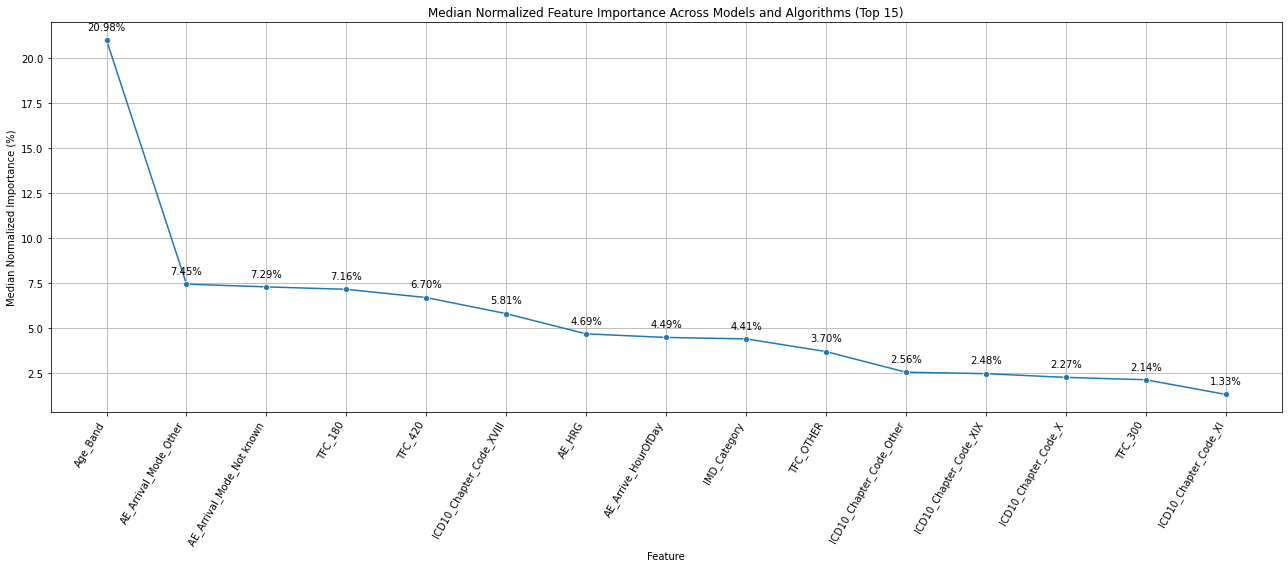

In [76]:
# Normalize the importance score for each (Model, Algorithm) pair
grouped = combined_importance.groupby(['Model', 'Algorithm'])
combined_importance['Normalized_Importance'] = grouped['Importance'].transform(lambda x: x / x.sum())

# Convert to percentage
combined_importance['Normalized_Importance_Percentage'] = combined_importance['Normalized_Importance'] * 100

# Compute median importance for each feature and sort
median_importance = combined_importance.groupby('Feature')['Normalized_Importance_Percentage'].median().sort_values(ascending=False)

# Take only top 15 features
median_importance_top15 = median_importance.head(15).reset_index()
median_importance_top15.columns = ['Feature', 'Median Normalized Importance (%)']

# Plotting
plt.figure(figsize=(18, 8))
sns.lineplot(data=median_importance_top15, x='Feature', y='Median Normalized Importance (%)', marker="o")

plt.title('Median Normalized Feature Importance Across Models and Algorithms (Top 15)')
plt.xticks(rotation=60, fontsize=10, ha='right')  # Increase rotation and reduce font size
plt.grid(True)

# Annotate points
for i, txt in enumerate(median_importance_top15['Median Normalized Importance (%)']):
    plt.annotate(f"{txt:.2f}%", (i, txt), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()  # Adjust layout to prevent clipping
plt.savefig(results_folder / "combined_feature_importance3.png", bbox_inches='tight')
plt.show()

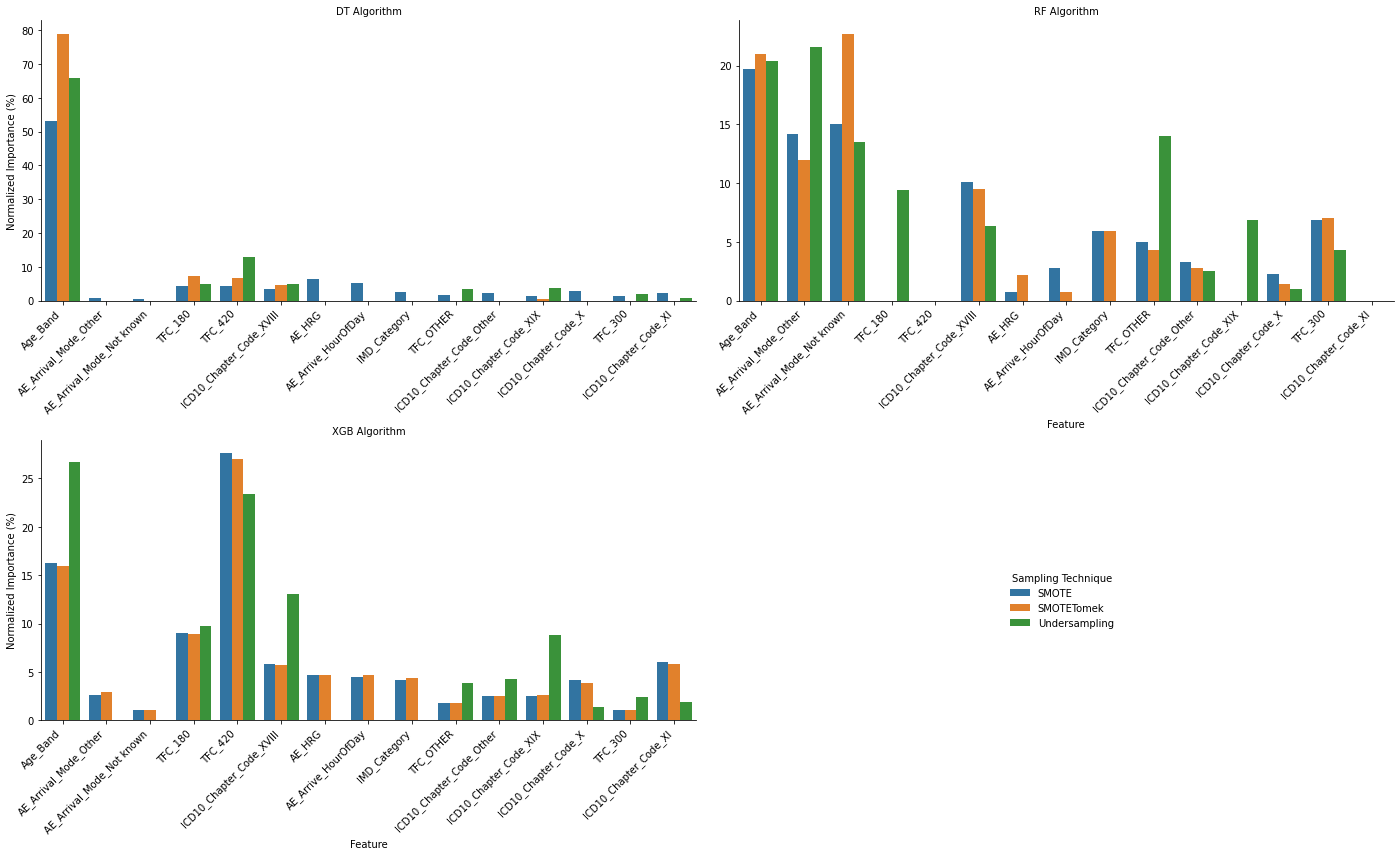

In [75]:
# Compute median importance for each feature and sort
median_importance = combined_importance.groupby('Feature')['Normalized_Importance_Percentage'].median().sort_values(ascending=False)

# Take only top 15 features
top_15_features = median_importance.index[:15]

# Filter your DataFrame to only include these top 15 features
filtered_importance = combined_importance[combined_importance['Feature'].isin(top_15_features)]

# Create a FacetGrid that separates your data by Algorithm
g = sns.FacetGrid(filtered_importance, col="Algorithm", col_wrap=2, sharex=False, sharey=False, height=6, aspect=1.5)

# Map a bar plot onto each FacetGrid
g.map_dataframe(sns.barplot, x="Feature", y="Normalized_Importance_Percentage", hue="Model", order=top_15_features, hue_order=["SMOTE", "SMOTETomek", "Undersampling"], palette="tab10")

# Rotate the x-axis labels for better visibility
g.set_xticklabels(rotation=45, ha='right')

# Add y-axis label and title to each sub-plot
g.set_axis_labels('Feature', 'Normalized Importance (%)')
g.set_titles(col_template="{col_name} Algorithm")

# Add a legend
g.add_legend(title='Sampling Technique', bbox_to_anchor=(0.8, 0.3))
plt.tight_layout()
plt.savefig(results_folder / "individual_feature_importance.png", bbox_inches='tight')
plt.show()

# Stacked horizontal bar chart

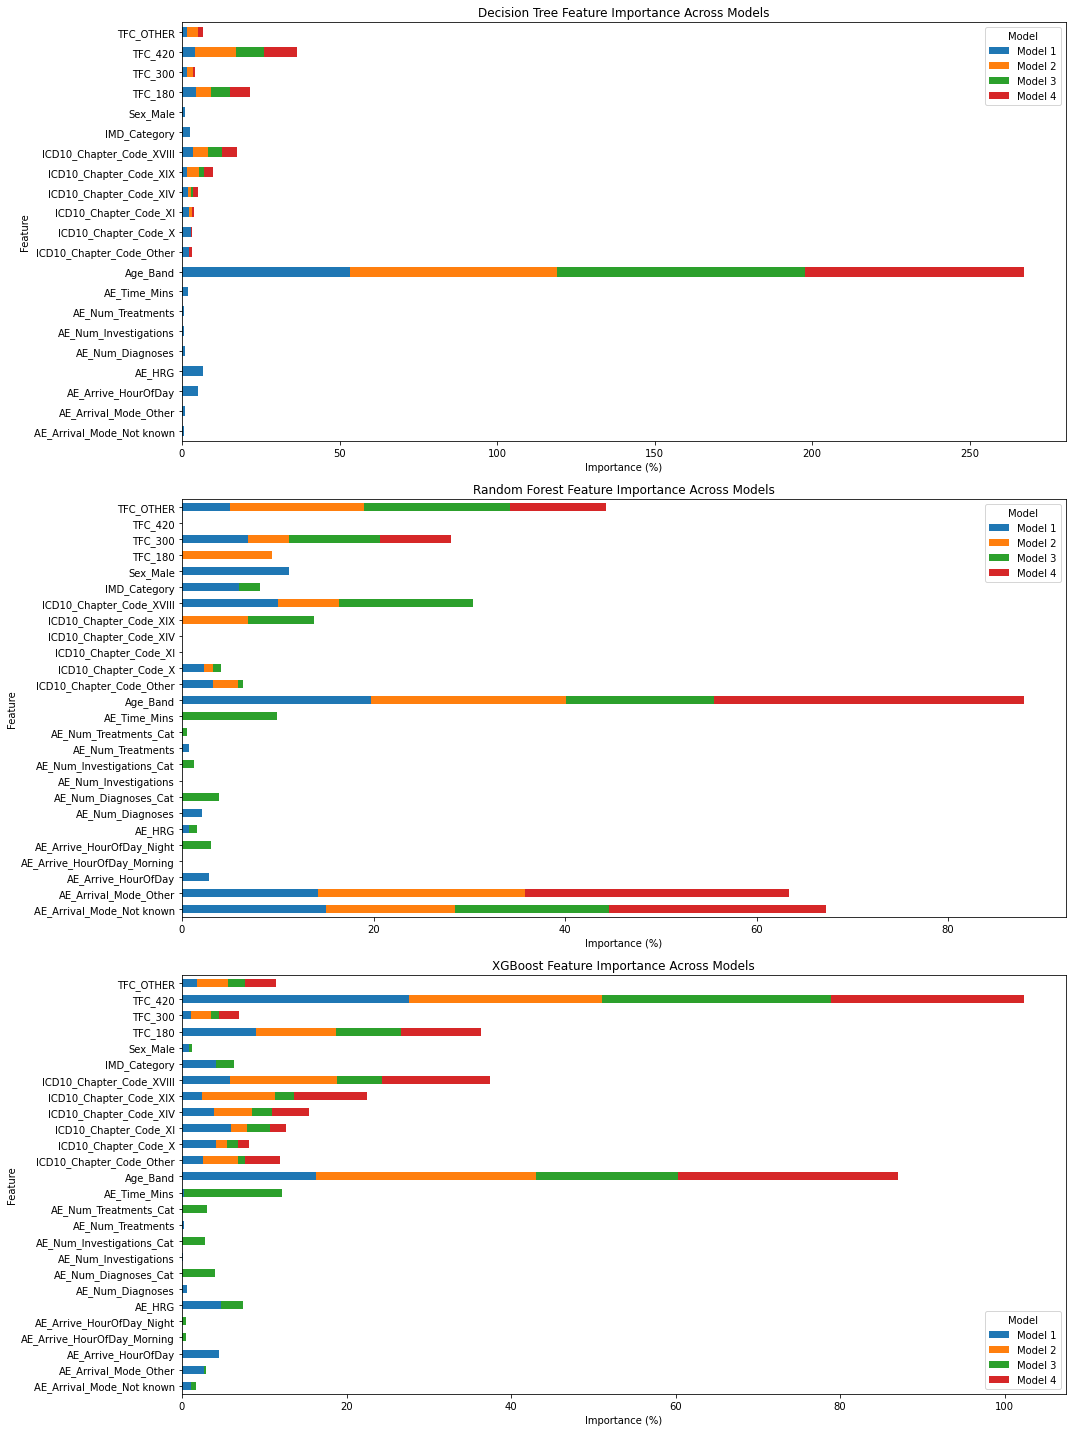

In [10]:
# Create a subplot of 3 grids
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

def plot_stacked_bar(df, ax, algorithm):
    df_grouped = df.groupby(['Feature', 'Model'])['Importance'].mean().unstack().fillna(0)
    df_grouped.plot(kind='barh', stacked=True, ax=ax)
    ax.set_title(f"{algorithm} Feature Importance Across Models")
    ax.set_xlabel("Importance (%)")

# Create stacked bar charts
plot_stacked_bar(all_DT_df, axes[0], 'Decision Tree')
plot_stacked_bar(all_RF_df, axes[1], 'Random Forest')
plot_stacked_bar(all_XGBoost_df, axes[2], 'XGBoost')

plt.tight_layout()
plt.show()


# Stacked bar charts in ascending order

In [23]:
def plot_stacked_bar(df, algorithm):
    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(15, 12))
    
    # Group by 'Feature' and 'Model', then calculate the mean importance for each feature
    df_grouped = df.groupby(['Feature', 'Model'])['Importance'].mean().unstack().fillna(0)
    
    # Sum the importance across all models for each feature
    df_grouped['Total_Importance'] = df_grouped.sum(axis=1)
    
    # Sort the DataFrame by 'Total_Importance' in descending order
    df_grouped.sort_values('Total_Importance', ascending=True, inplace=True)
    
    # Drop the 'Total_Importance' column as we don't need it for plotting
    df_grouped.drop(columns='Total_Importance', inplace=True)
    
    # Create the horizontal stacked bar chart
    df_grouped.plot(kind='barh', stacked=True, ax=ax)
    
    # Labeling and Titles
    ax.set_title(f"{algorithm} Feature Importance Across Models")
    ax.set_xlabel("Importance (%)")

    # Save the plot
    fig.savefig(results_folder / f"feature_importance_{algorithm}.png")


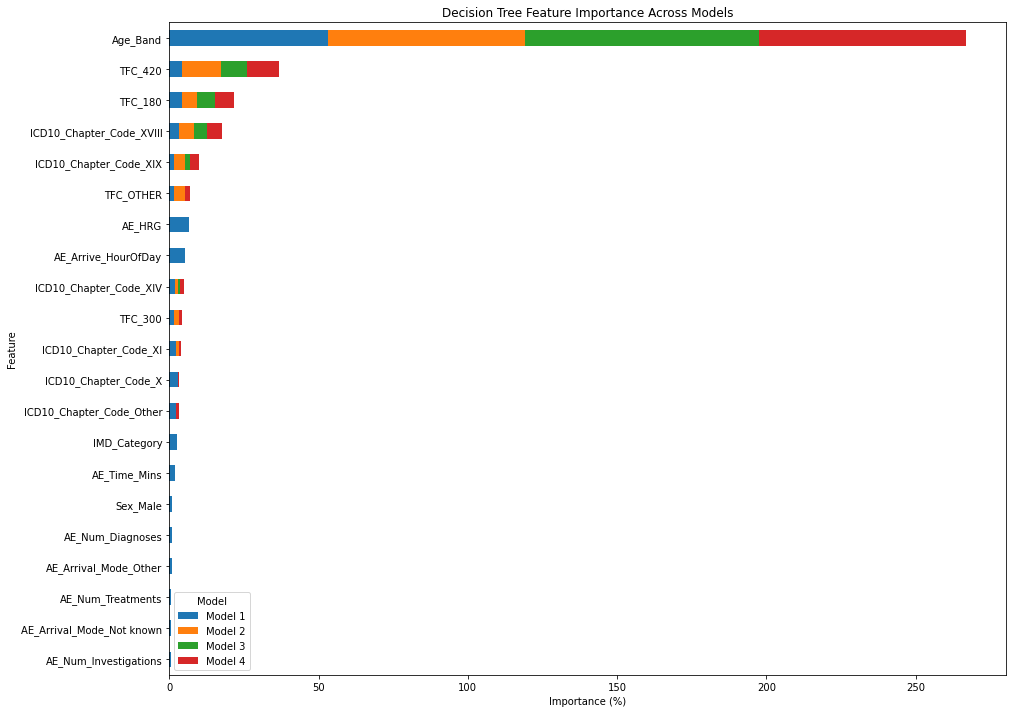

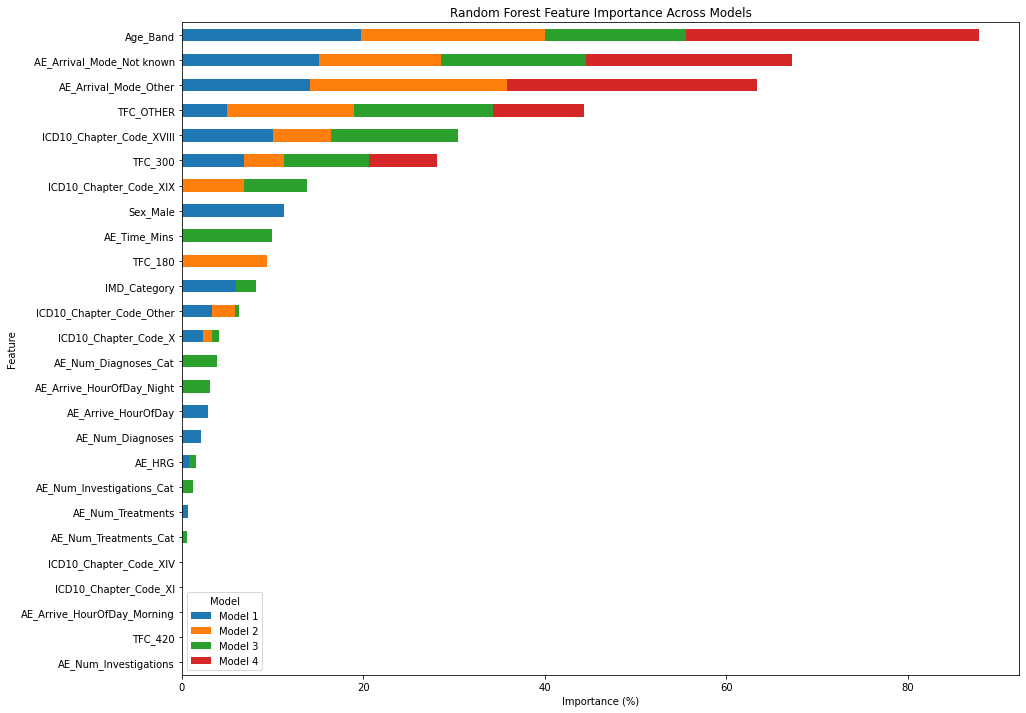

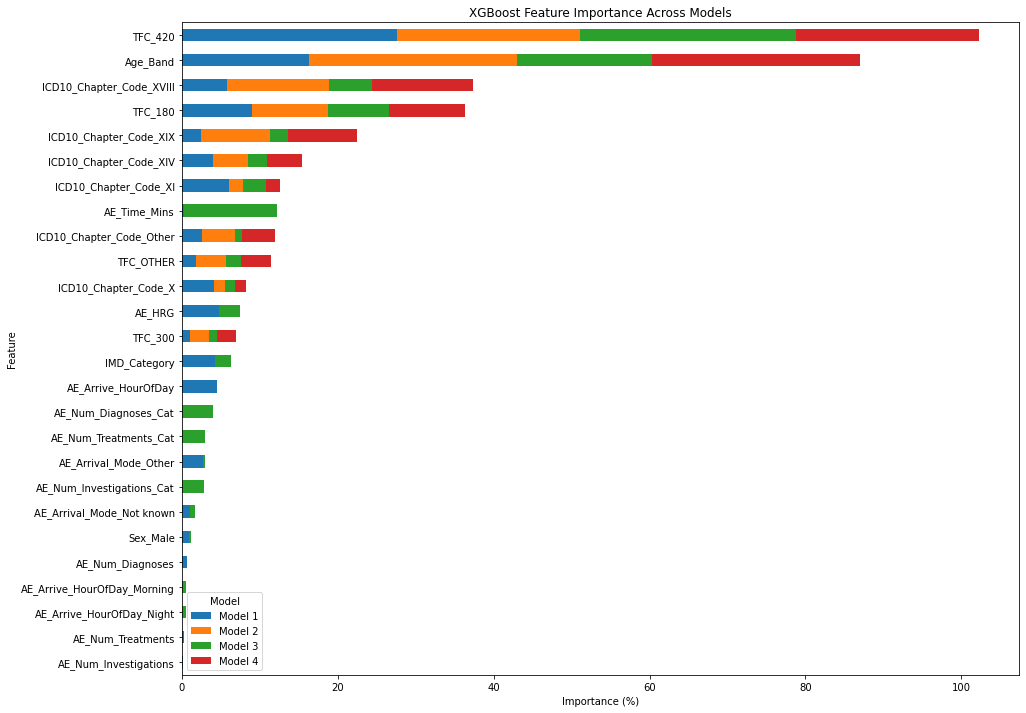

In [24]:
plot_stacked_bar(all_DT_df, 'Decision Tree')
plot_stacked_bar(all_RF_df, 'Random Forest')
plot_stacked_bar(all_XGBoost_df, 'XGBoost')

# Heatmaps

In [26]:
pivot_DT_df = all_DT_df.pivot_table(index='Feature', columns='Model', values='Importance', fill_value=0)

pivot_RF_df = all_RF_df.pivot_table(index='Feature', columns='Model', values='Importance', fill_value=0)

pivot_XGBoost_df = all_XGBoost_df.pivot_table(index='Feature', columns='Model', values='Importance', fill_value=0)

print(pivot_DT_df.head())



Model                       Model 1  Model 2  Model 3  Model 4
Feature                                                       
AE_Arrival_Mode_Not known  0.636030      0.0      0.0      0.0
AE_Arrival_Mode_Other      0.870671      0.0      0.0      0.0
AE_Arrive_HourOfDay        5.090639      0.0      0.0      0.0
AE_HRG                     6.557033      0.0      0.0      0.0
AE_Num_Diagnoses           1.024116      0.0      0.0      0.0


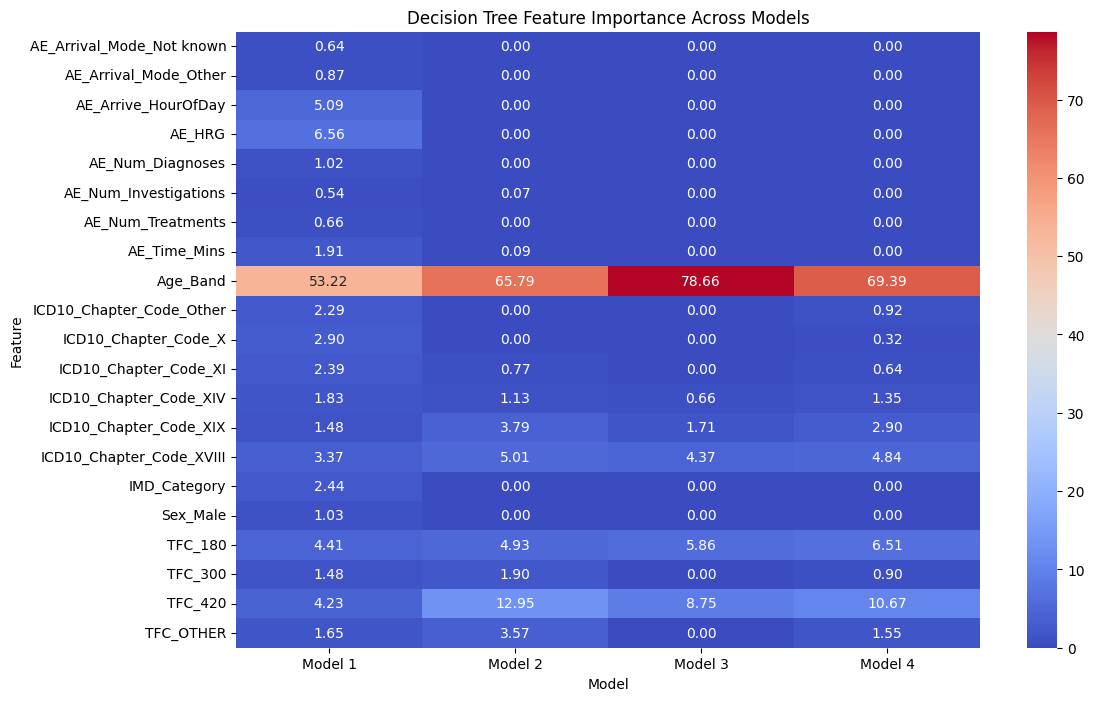

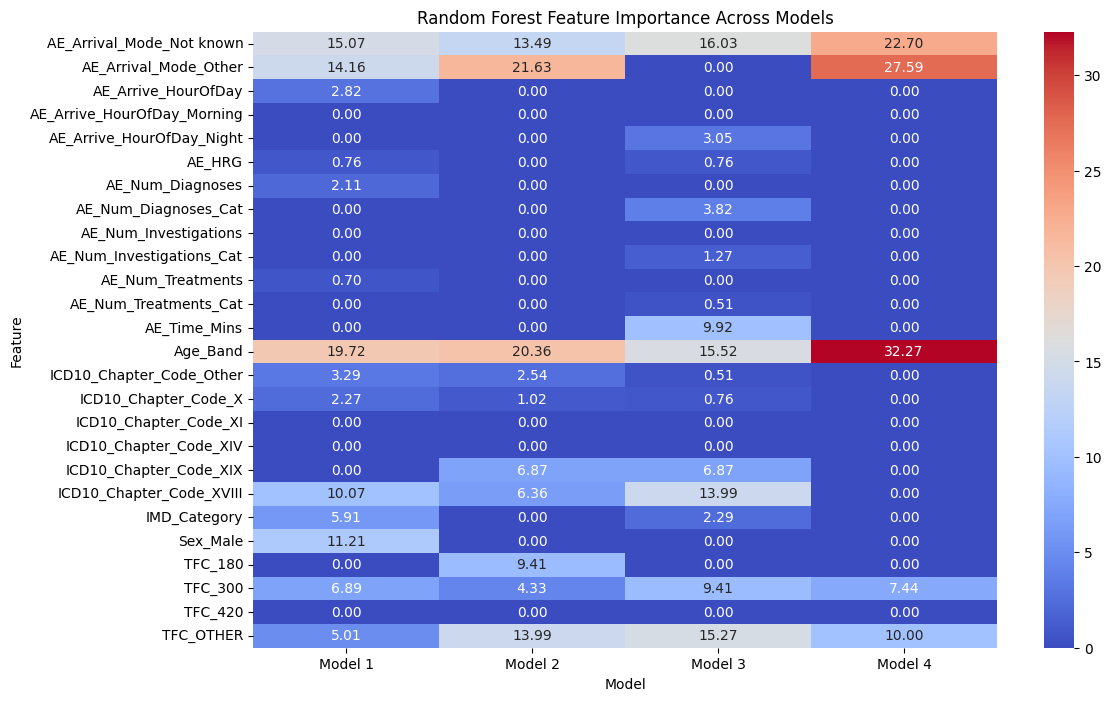

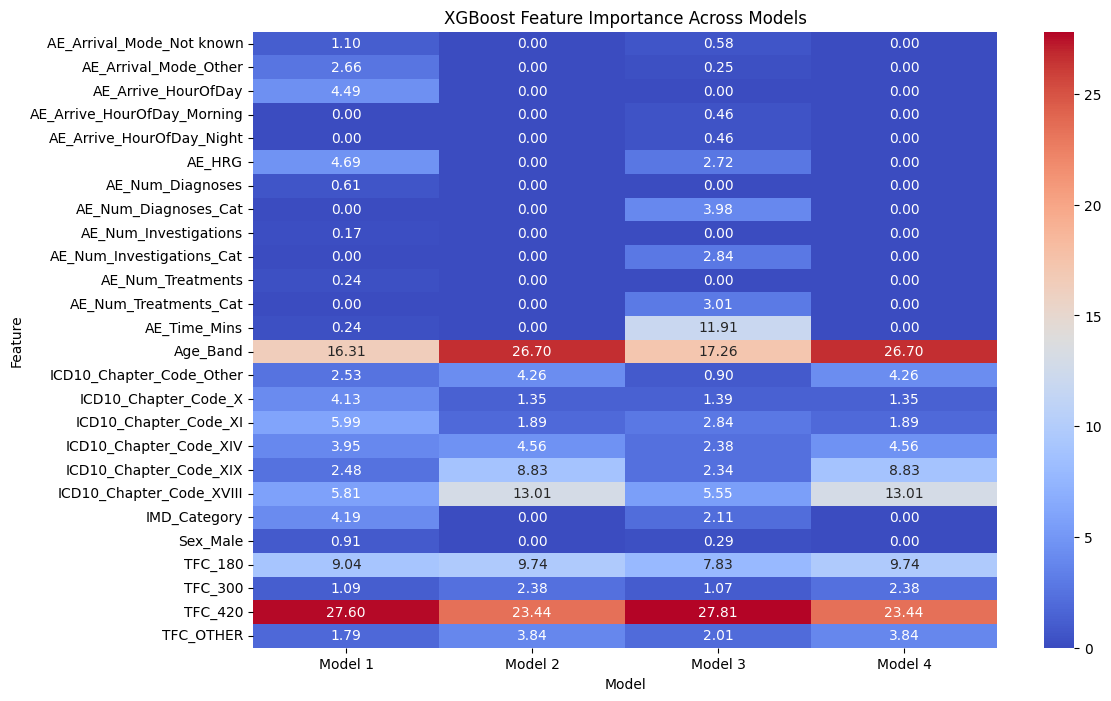

In [27]:
# Plotting feature importance
def plot_feature_importance(pivot_df, algorithm_name):
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"{algorithm_name} Feature Importance Across Models")
    plt.show()

# Average feature importance across models
def average_importance(pivot_df):
    return pivot_df.mean(axis=1).sort_values(ascending=False)

plot_feature_importance(pivot_DT_df, "Decision Tree")
plot_feature_importance(pivot_RF_df, "Random Forest")
plot_feature_importance(pivot_XGBoost_df, "XGBoost")



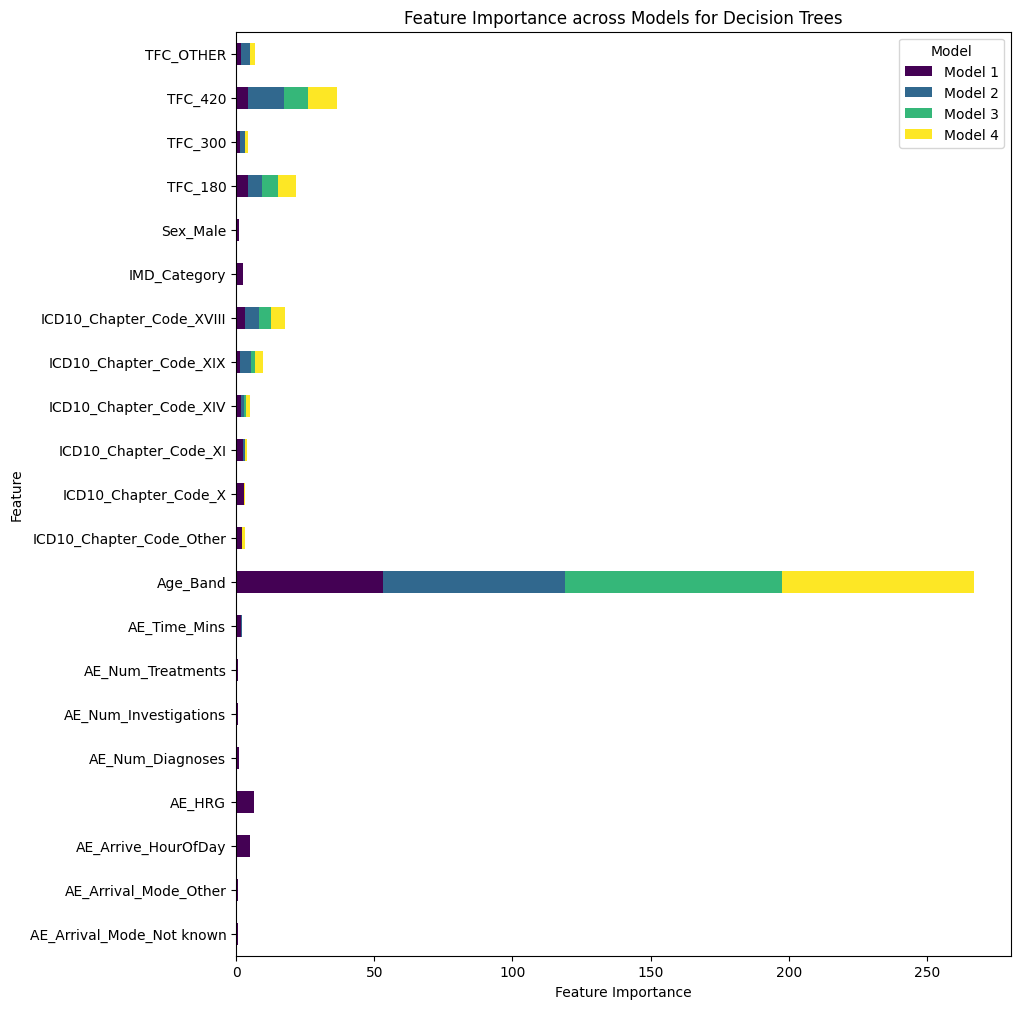

In [41]:
# Stacked bar chart of features importances scores for DT
ax = pivot_DT_df.plot(kind='barh', stacked=True, figsize=(10, 12), cmap='viridis')
plt.title('Feature Importance across Models for Decision Trees')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

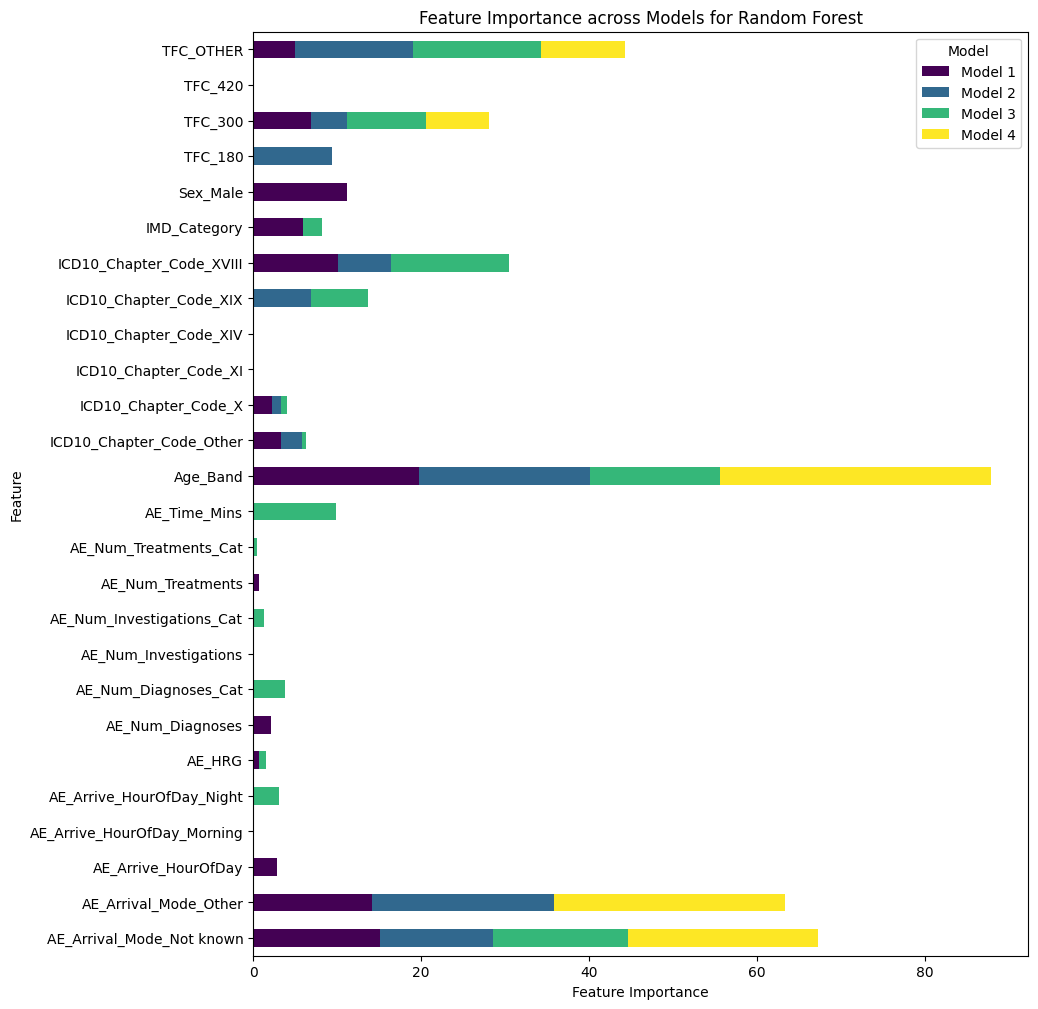

In [42]:
# Stacked bar chart of features importances scores for RF
ax = pivot_RF_df.plot(kind='barh', stacked=True, figsize=(10, 12), cmap='viridis')
plt.title('Feature Importance across Models for Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

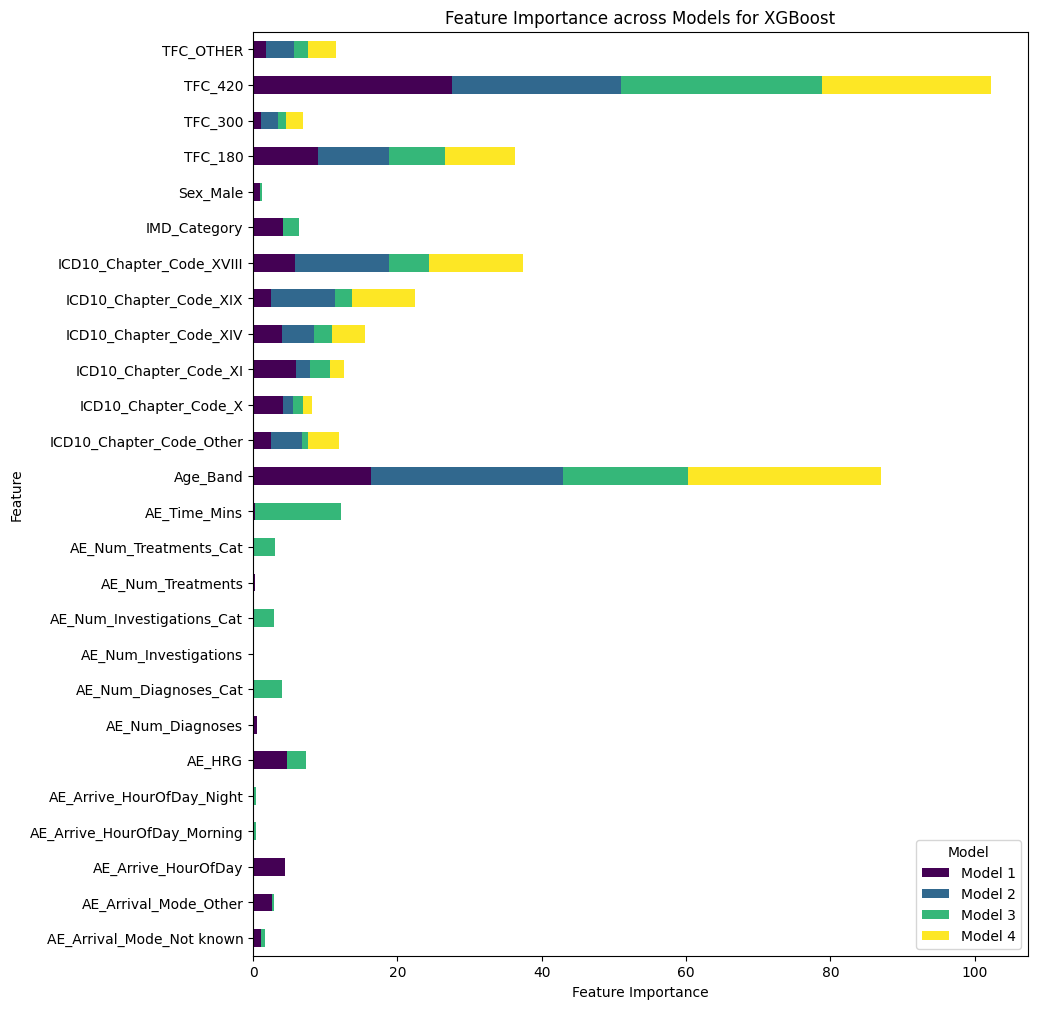

In [43]:
ax = pivot_XGBoost_df.plot(kind='barh', stacked=True, figsize=(10, 12), cmap='viridis')
plt.title('Feature Importance across Models for XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Stacked bar chart of features importances scores for XGBoost
ax = pivot_XGBoost_df.plot(kind='barh', stacked=True, figsize=(10, 12), cmap='viridis')
plt.title('Feature Importance across Models for Extreme Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Top 15 most important features

In [44]:
# Concatenate all DataFrames
all_algorithms_df = pd.concat([all_DT_df, all_RF_df, all_XGBoost_df], ignore_index=True)

# Group by 'Feature' and calculate mean importance
grouped_df = all_algorithms_df.groupby('Feature')['Importance'].mean()

# Sort by importance and get the top 15 features
top_15_features = grouped_df.sort_values(ascending=False).head(15)

print("Top 15 most important features across all algorithms:")
print(top_15_features)


Top 15 most important features across all algorithms:
Feature
Age_Band                     36.824048
TFC_420                      11.573145
AE_Arrival_Mode_Other        11.194306
AE_Arrival_Mode_Not known     9.943383
ICD10_Chapter_Code_XVIII      7.116818
TFC_OTHER                     5.681744
TFC_180                       5.622946
AE_Arrive_HourOfDay           4.131369
AE_Time_Mins                  4.013744
AE_Num_Diagnoses_Cat          3.898103
ICD10_Chapter_Code_XIX        3.842561
TFC_300                       3.571218
IMD_Category                  3.389189
Sex_Male                      3.362556
AE_HRG                        3.096991
Name: Importance, dtype: float64


# Comparisons of feature importance scores across models and algorithms (Normalised)

Normalize the Scores: For each model within each algorithm, normalize the feature importance scores to lie within a 0-to-1 range. The normalization formula is:



Normalized score = Original Score −Minimum Absolute Value of All Scores)/
Maximum Absolute Value of All Scores



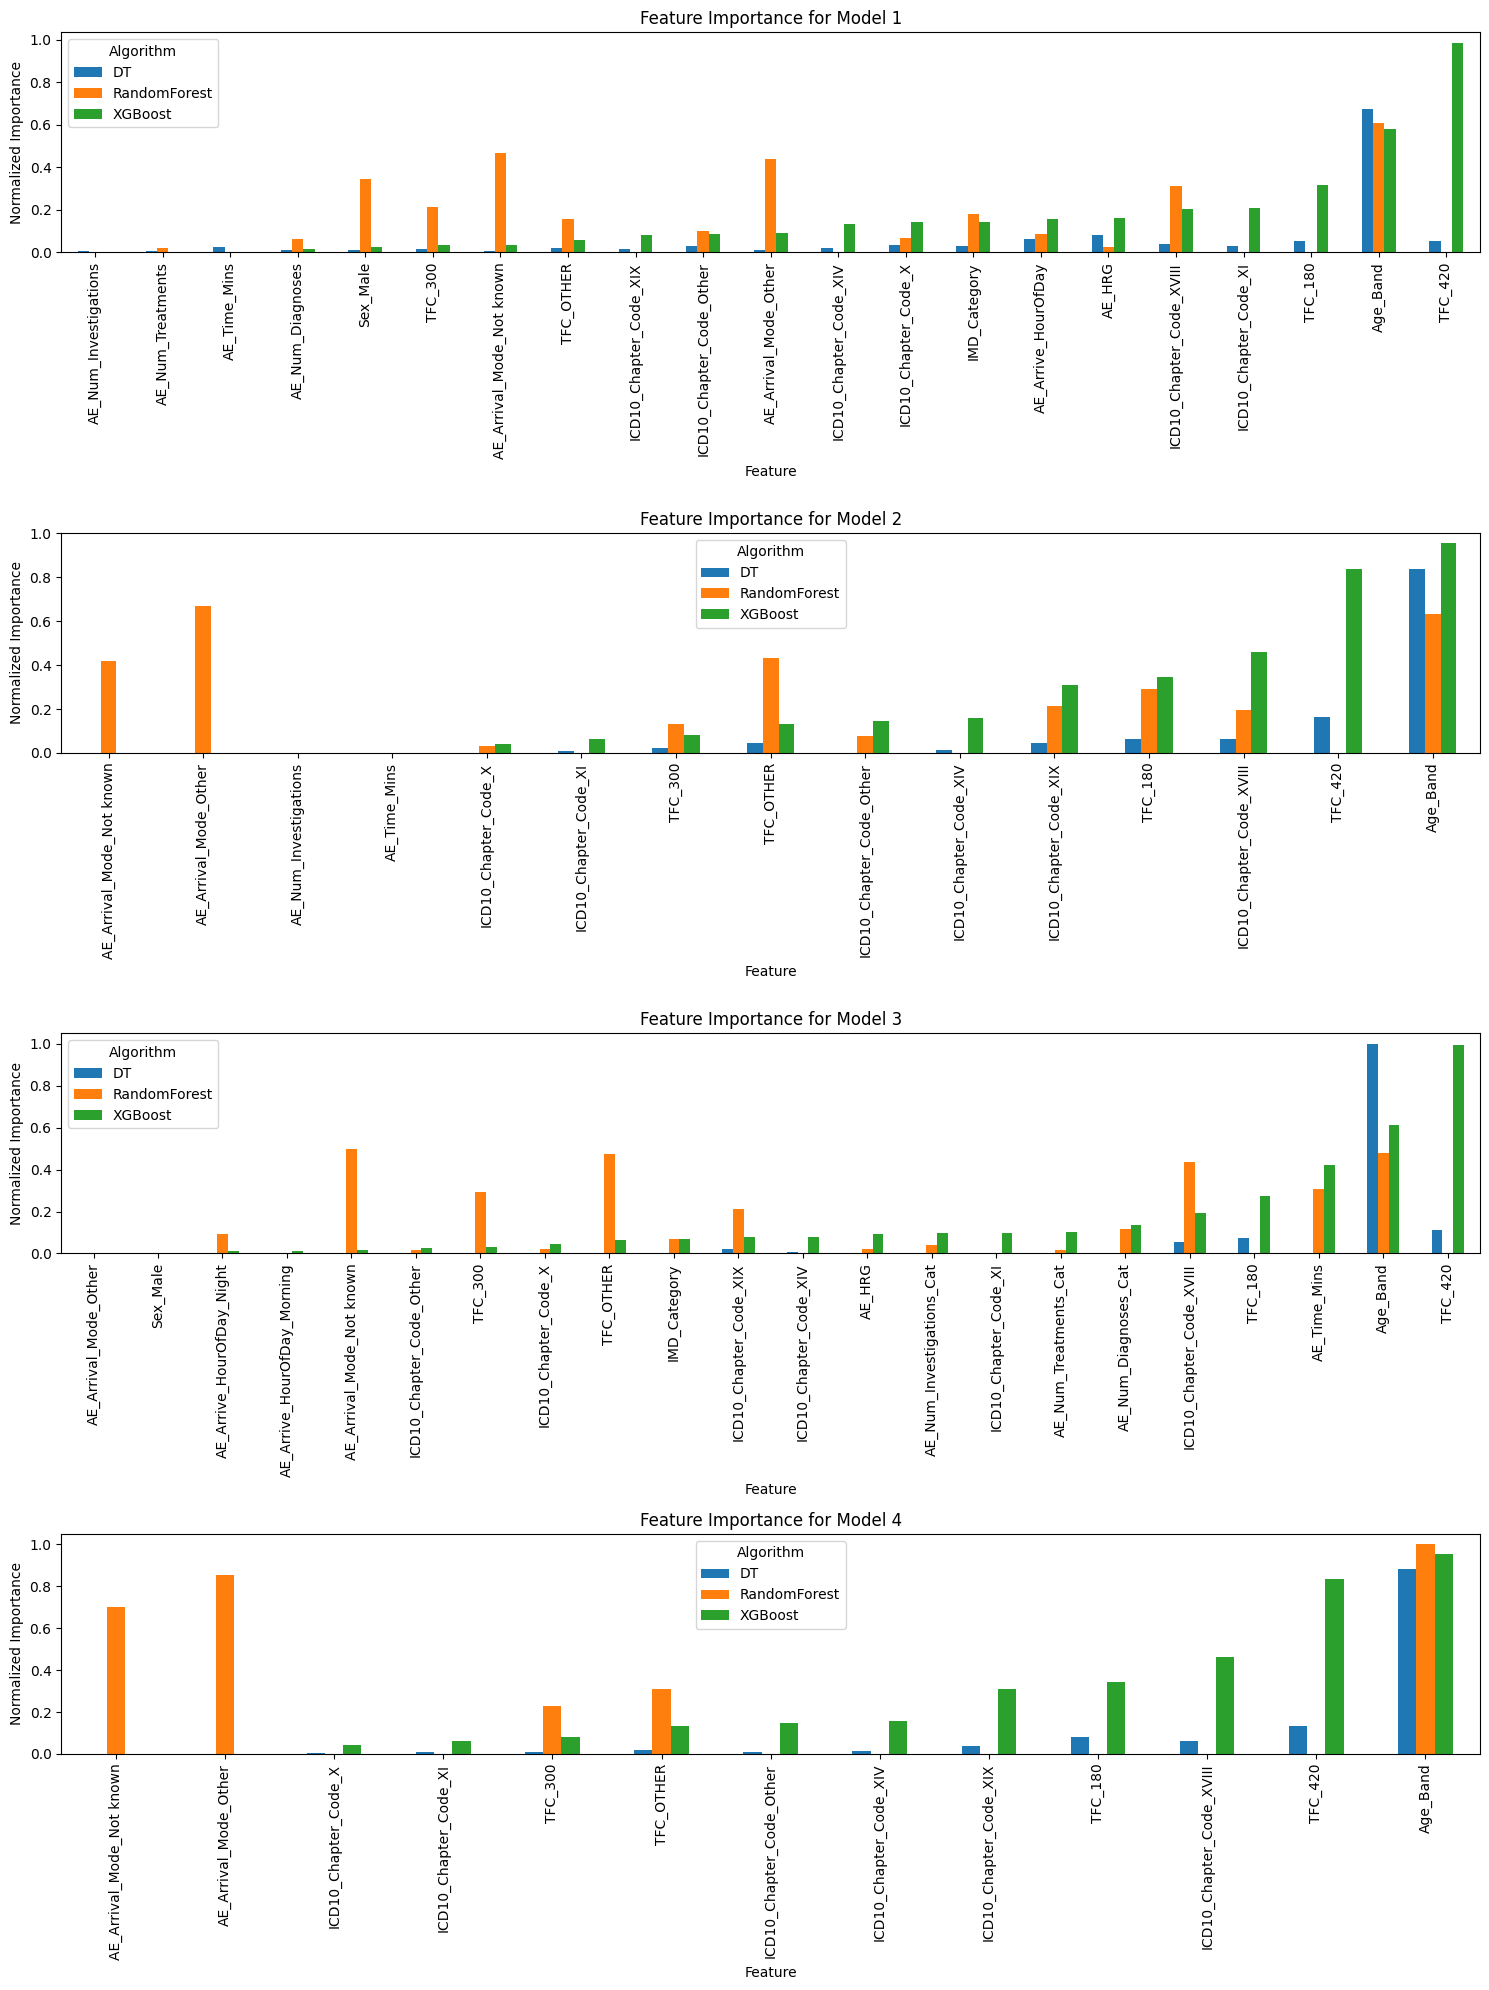

In [46]:
def normalize_scores(df):
    min_val = df['Importance'].abs().min()
    max_val = df['Importance'].abs().max()
    df['Normalized_Importance'] = (df['Importance'] - min_val) / max_val
    return df

# Normalize the scores
normalized_DT_df = normalize_scores(all_DT_df)
normalized_RF_df = normalize_scores(all_RF_df)
normalized_XGBoost_df = normalize_scores(all_XGBoost_df)

# Combine all DataFrames for easy plotting
all_dfs = [normalized_DT_df, normalized_RF_df, normalized_XGBoost_df]
all_df = pd.concat(all_dfs, ignore_index=True)

# Create plots
plt.figure(figsize=(15, 20))

for i, (model_name, group_df) in enumerate(all_df.groupby('Model')):
    plt.subplot(len(all_df['Model'].unique()), 1, i+1)
    group_df = group_df.groupby(['Feature', 'Algorithm'])['Normalized_Importance'].mean().unstack().fillna(0)
    group_df.sort_values(by='XGBoost', ascending=True).plot(kind='bar', ax=plt.gca())
    plt.title(f'Feature Importance for {model_name}')
    plt.ylabel('Normalized Importance')

plt.tight_layout()
plt.show()

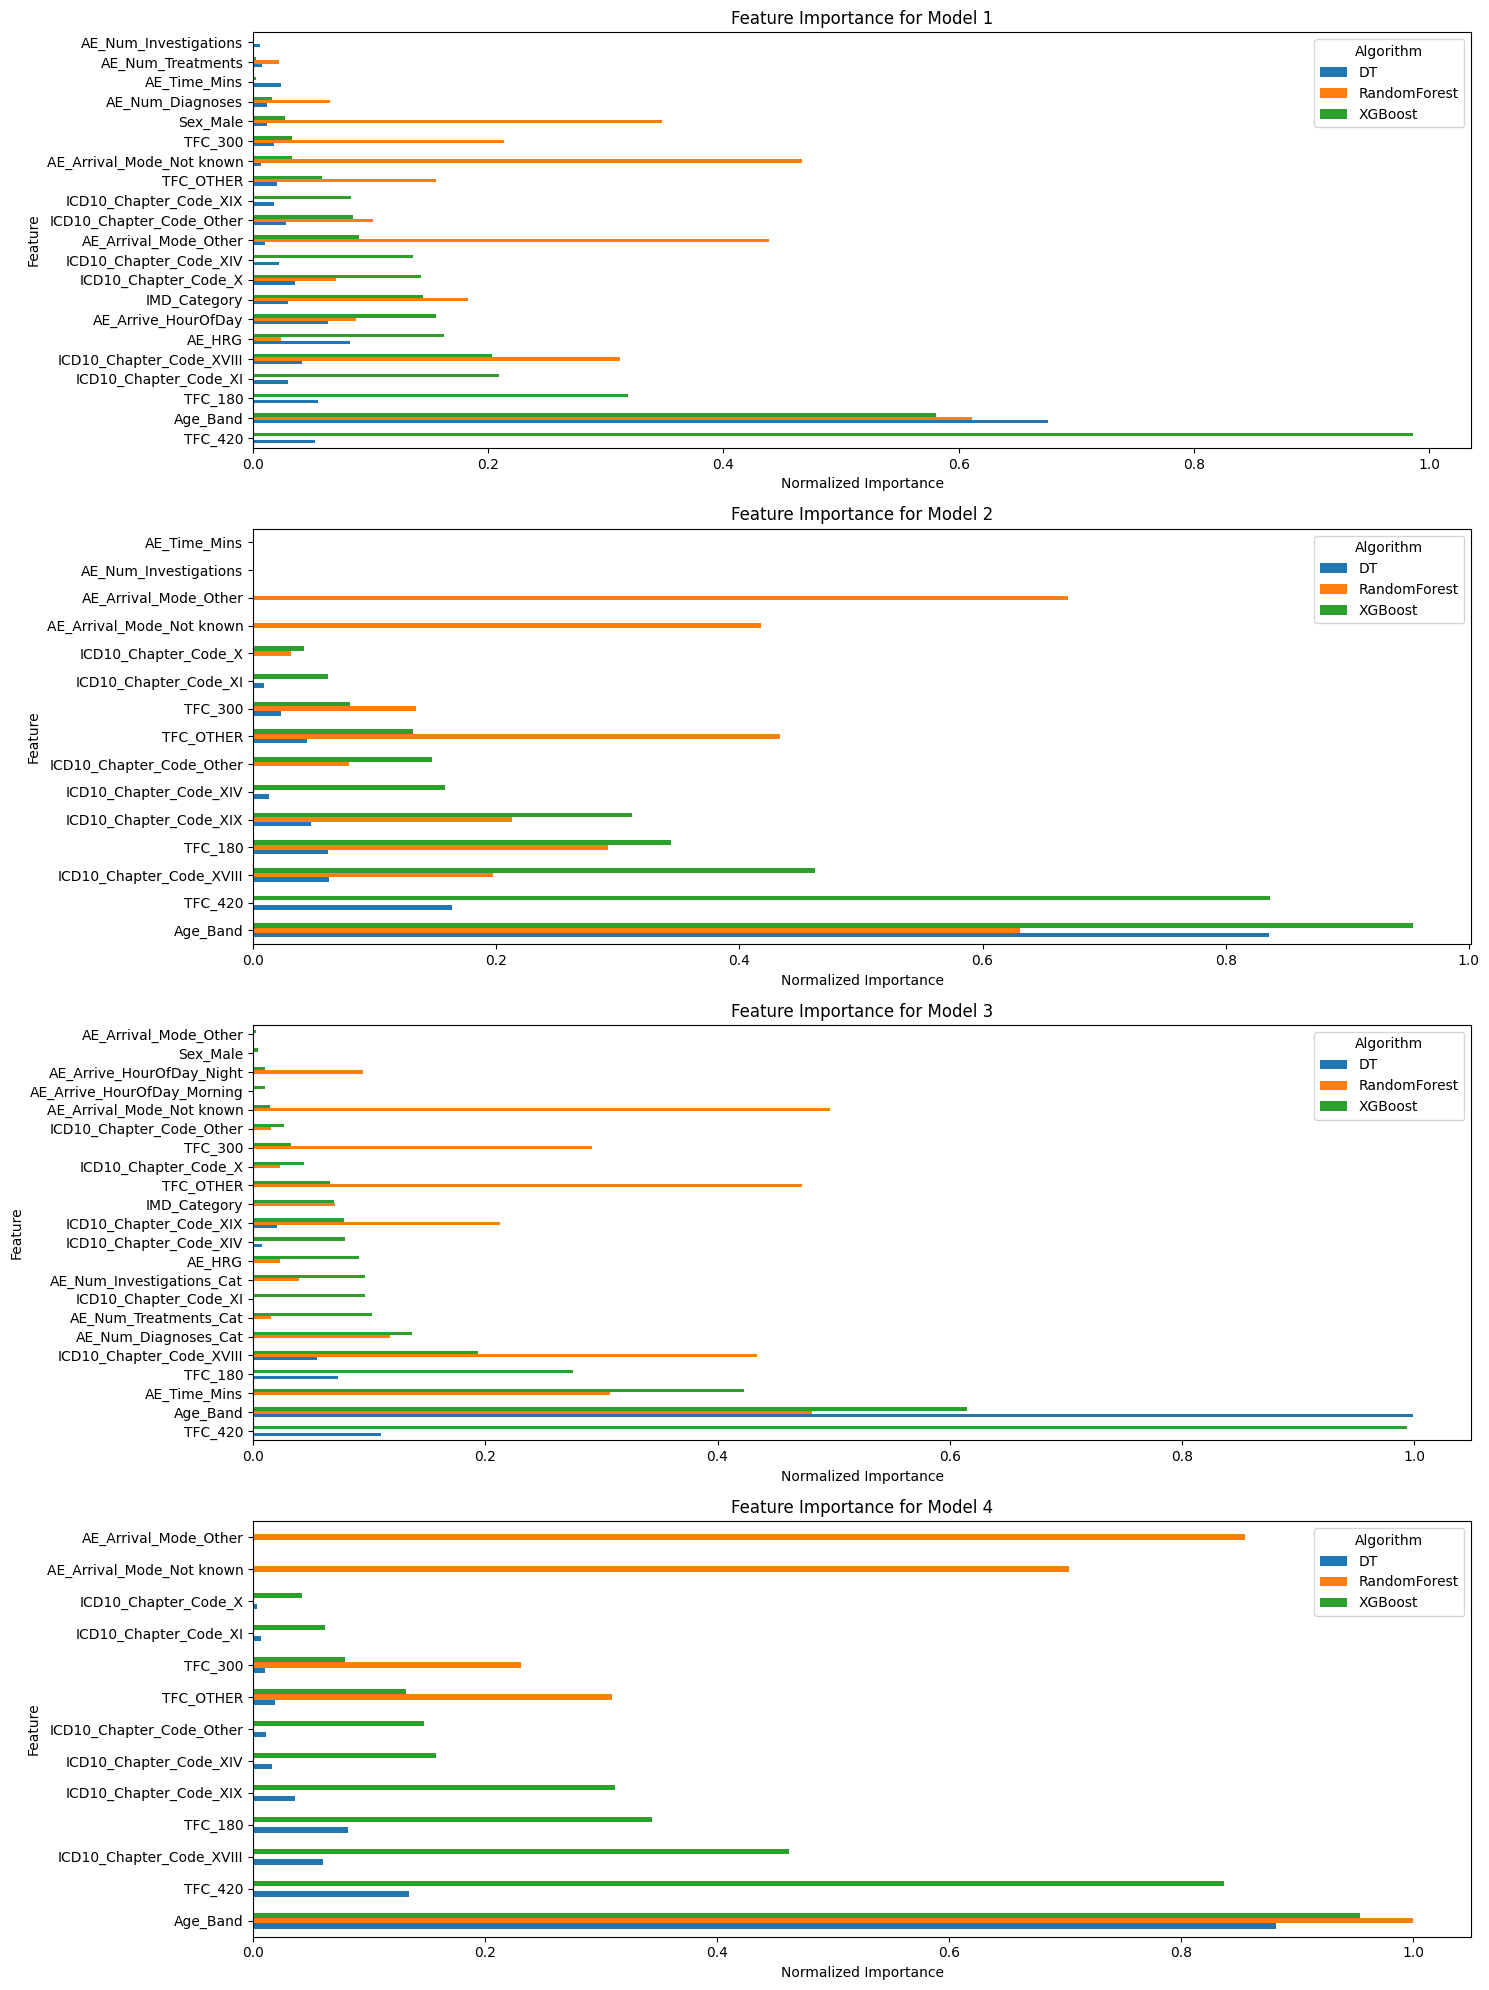

In [47]:
# Create plots
plt.figure(figsize=(15, 20))

for i, (model_name, group_df) in enumerate(all_df.groupby('Model')):
    plt.subplot(len(all_df['Model'].unique()), 1, i+1)
    
    # Group by 'Feature' and 'Algorithm', and calculate the mean normalized importance
    group_df = group_df.groupby(['Feature', 'Algorithm'])['Normalized_Importance'].mean().unstack().fillna(0)
    
    # Sort by XGBoost's importance scores
    group_df.sort_values(by='XGBoost', ascending=False, inplace=True)
    
    # Create horizontal bar plot
    group_df.plot(kind='barh', ax=plt.gca())
    
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Normalized Importance')

plt.tight_layout()
plt.show()
